In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchvision

In [3]:
import torchxrayvision as xrv

In [4]:
dataset_path = "/home/groups/akshaysc/joecohen/"

In [5]:
def plot_sample_with_masks(sample, df):
    
    if "semantic_masks" in sample:
        width = len(sample["semantic_masks"])
        fig, axs = plt.subplots(1, max(2,1+width), sharey=True, figsize=(3+3*width,3))
        axs[0].imshow(sample["img"][0], cmap="Greys_r");
        axs[0].set_title("idx:" + str(sample["idx"]))
    
        for i, patho in enumerate(sample["semantic_masks"].keys()):
            axs[i+1].imshow(sample["img"][0], cmap="Greys_r");
            axs[i+1].imshow(sample["semantic_masks"][patho][0]+1, alpha=0.5);
            axs[i+1].set_title(patho)
        plt.show()
        
    if "pathology_masks" in sample:
        width = len(sample["pathology_masks"])
        fig, axs = plt.subplots(1, max(2,1+width), sharey=True, figsize=(3+3*width,3))
        axs[0].imshow(sample["img"][0], cmap="Greys_r");
        axs[0].set_title("idx:" + str(sample["idx"]))
        for i, patho in enumerate(sample["pathology_masks"].keys()):
            axs[i+1].imshow(sample["img"][0], cmap="Greys_r");
            axs[i+1].imshow(sample["pathology_masks"][patho][0]+1, alpha=0.5);
            axs[i+1].set_title(df.pathologies[patho])
        plt.show()
    pd.DataFrame(sample["lab"], index=df.pathologies)

In [5]:
d_nih = xrv.datasets.NIH_Dataset(imgpath=dataset_path + "/NIH/images-224",
                                views=["PA","AP"], unique_patients=False, pathology_masks=True)


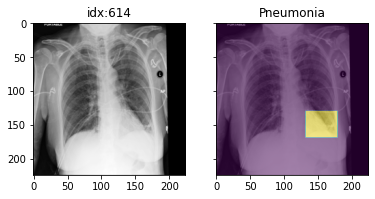

In [20]:
sample = d_nih[614]
plot_sample_with_masks(sample, d_nih)

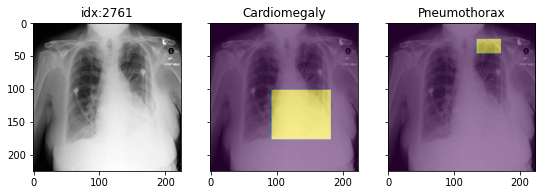

In [21]:
subset = d_nih.csv["Image Index"] == "00000732_005.png"
for idx in np.where(subset)[0][:10]:
    plot_sample_with_masks(d_nih[idx], d_nih)

In [17]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

data_transforms = torchvision.transforms.Compose([
        xrv.datasets.ToPILImage(),
        torchvision.transforms.RandomAffine(45, translate=(0.15, 0.15), scale=(0.85, 1.15)),
        torchvision.transforms.ToTensor()
    ])

In [25]:
d_nih_aug = xrv.datasets.NIH_Dataset(imgpath=dataset_path + "/NIH/images-224",
                                 views=["PA","AP"], unique_patients=False, pathology_masks=True,
                                 transform=transform,
                                 data_aug=data_transforms)


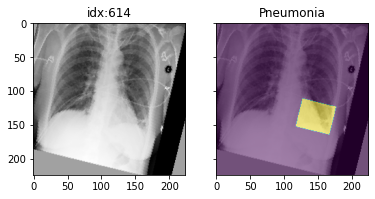

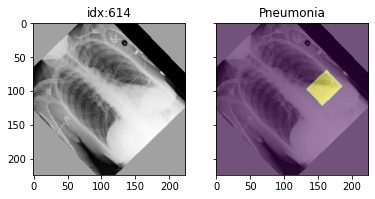

In [28]:
for i in range(2):
    sample = d_nih_aug[614]
    plot_sample_with_masks(sample, d_nih_aug)

In [34]:
#RSNA_Pneumonia_Dataset
d_rsna = xrv.datasets.RSNA_Pneumonia_Dataset(imgpath=dataset_path + "kaggle-pneumonia-jpg/stage_2_train_images_jpg", 
                                            views=["PA","AP"],
                                            pathology_masks=True)


In [35]:
d_rsna.csv.has_masks.value_counts()

False    20672
True      6012
Name: has_masks, dtype: int64

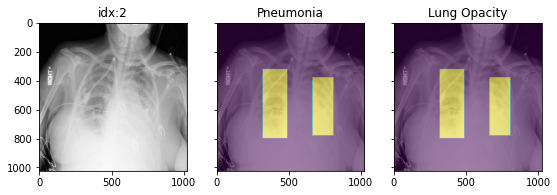

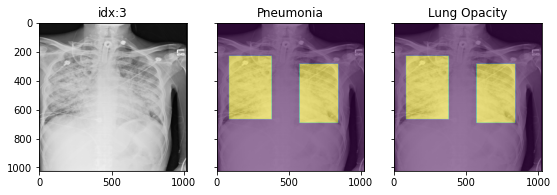

In [37]:
for idx in np.where(d_rsna.csv.has_masks)[0][:2]:
    plot_sample_with_masks(d_rsna[idx], d_rsna)

In [18]:
#COVID-19 Dataset
d_covid = xrv.datasets.COVID19_Dataset(imgpath=dataset_path + "covid-chestxray-dataset/images", 
                                       csvpath=dataset_path + "covid-chestxray-dataset/metadata.csv", 
                                       views=["PA","AP", "AP Supine"],
                                       semantic_masks=True,
                                       transform=transform)


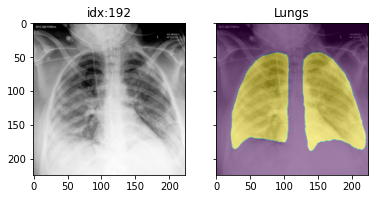

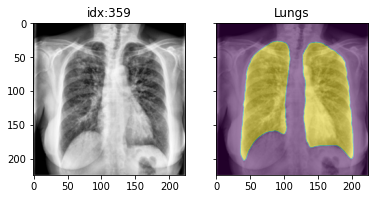

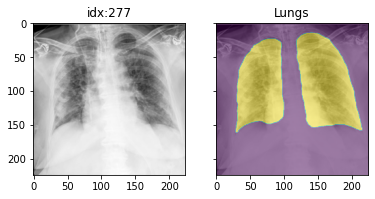

In [24]:
np.random.seed(0)
for idx in np.random.choice(range(len(d_covid)), 8):
    sample = d_covid[idx]
    if len(sample["semantic_masks"]) > 0:
        plot_sample_with_masks(sample, d_covid)

In [25]:
d_siim = xrv.datasets.SIIM_Pneumothorax_Dataset(
    imgpath=dataset_path + "SIIM_TRAIN_TEST/dicom-images-train/",
    csvpath=dataset_path + "SIIM_TRAIN_TEST/train-rle.csv",
    transform=transform,
    unique_patients=False, masks=True)


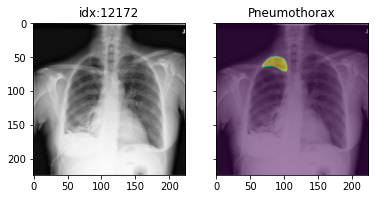

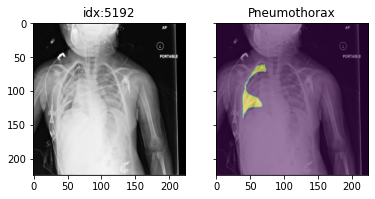

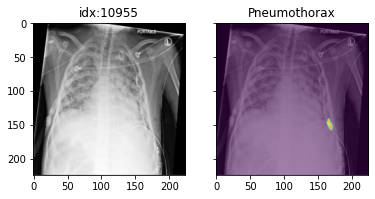

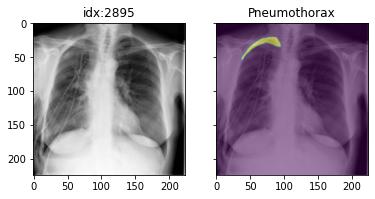

In [27]:
np.random.seed(1)
for idx in np.random.choice(range(len(d_siim)), 8):
    sample = d_siim[idx]
    if len(sample["pathology_masks"]) > 0:
        plot_sample_with_masks(sample, d_siim)